## Observations and Insights

#### Observation 1

All the tumor volumes at the original timepoint are equal at 45 mm3.

This allows comparison of final tumor volumes as one measure of drug efficacy. 

Inspecting the mean tumor volume at the final time point, only **two** drug regmimens **reduce** the tumor volume, _Capomulin_ and _Ramicane). 

Interestingly, both of these drugs have around 22\% (or 40) more datapoints than the other regimens as seen in the table below 

| Drug Regimen     | Number of Samples |
|------------------|-------------------|
| Capomulin        | 230               |
| Ramicane     228 | 228               |
| Ketapril     188 | 188               |
| Naftisol     186 | 186               |
| Zoniferol    182 | 182               |
| Stelasyn     181 | 181               |
| Placebo      181 | 181               |
| Infubinol    178 | 178               |
| Ceftamin     178 | 178               |
| Propriva     161 | 161               |


#### Observation 2

Inspecting an individual mouse under the **capomulin regimen** just looking at tumor volume over all mice reveals that tumor values can increase and decrease in size over the time frame, but in general there is a reduction in tumor size from the orignal timepoint to the final timepoint, even if the volume increases between first and last timepoint. 

This may indicate that the drug regimen is more effecitve over a certain period of time rather than at just two timepoints.

The **capomulin** treatment was also the most consistent regimen, with the least variance in tumor size across all mice in response to the treatment. 

#### Observation 3

 In this analysis we have focussed on the tumor volume (mm3) as one indicator of drug regimen effectivness.  
 
 However, there are many more measures that could lead to greater insights.  For example, we could inspect the survival rate of the mice (many mice do not have measurements for each timepoint which could indicate expiration), or the number of Metastatic Sites. The sex and age of the mouse may also likely impact each regimen result.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results  = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results  = pd.read_csv(study_results)

# Combine the data into a single dataset based on mouse id
df = pd.merge(study_results, mouse_metadata,  on="Mouse ID", how = "left")


#df
df.head(5)  # Show only first five rows of the dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

byRegimen = df.groupby("Drug Regimen")
tumor_col = 'Tumor Volume (mm3)'
# first create the dictionary with column names (keys) and statisics (values)
ss_dict = {'Mean Tumor volume'              : byRegimen[tumor_col].mean(), 
           'Median Tumor volume'            : byRegimen[tumor_col].median(), 
           'Tumor volume Variance'          : byRegimen[tumor_col].var(), 
           'Tumor volume Standard Deviation': byRegimen[tumor_col].std(), 
           'Tumor volume SEM'               : byRegimen[tumor_col].sem()}

# Create a new dataframe to hold the summary statistics
summaryStats = pd.DataFrame(data=ss_dict)
# Show the dataframe
summaryStats

,Mean Tumor volume,Median Tumor volume,Tumor volume Variance,Tumor volume Standard Deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, 
# variance, standard deviation, and SEM of the tumor volume for each regimen 

# Use the agg function tumor volume data grouped by drug regimen
tumors = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' 
       : ['mean',
          'median',
          'var',
          'std',
          'sem']}) 
# Show the dataframe
tumors

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

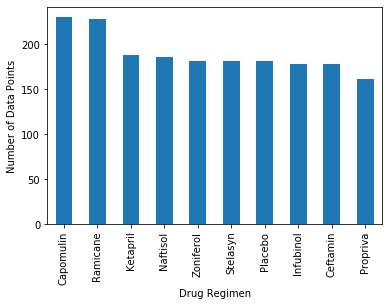

In [4]:
# Generate a bar plot showing number of data points for each 
# treatment regimen using pandas
# first count the datapoints for each treatment regimen
# note I am reusing the groupby result from above that grouped the data on regimen
plotData = byRegimen['Mouse ID'].count().sort_values(ascending = False)
# plot the data using pandas
barchart = plotData.plot.bar(x='Drug', y = "Quantity")
barchart.set_xlabel("Drug Regimen")
_       = barchart.set_ylabel("Number of Data Points")

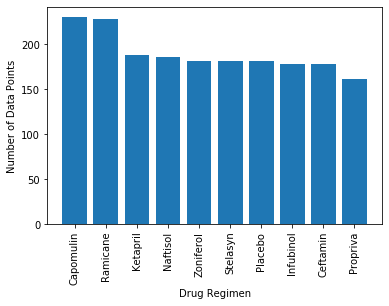

In [5]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot

# Count the number of mice (by id) in each regimen and sort them descending order
plotdf = byRegimen['Mouse ID'].count().sort_values(ascending = False)

# Set the values for the x_axis and map the drug names onto the values
x_axis = np.arange(len(plotdf))
plt.xticks(x_axis, plotdf.keys(), rotation=90)

# plot the data using pyplot
plt.bar(x_axis, plotdf, align="center")

# construct the titles
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
# Display the plot
plt.show()

## Pie plots

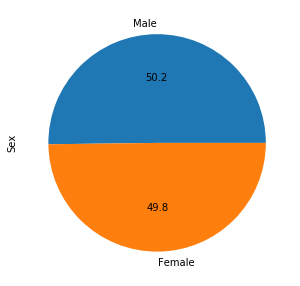

In [6]:
# Generate a pie plot showing the distribution of 
# female versus male mice using pandas
mf_mice = df.groupby(['Mouse ID', 'Sex']).size().groupby(level=1).count().sort_values(ascending = False)
plot    = mf_mice.plot(kind = 'pie', y ='Sex', figsize=(5, 5), autopct='%.1f')
_       = plot.set_ylabel("Sex")  #needed to set this to variable to supress output

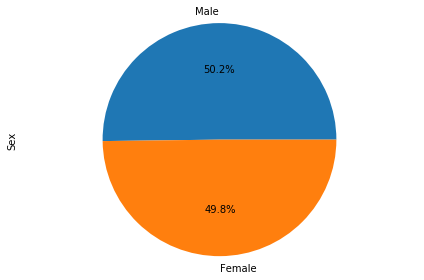

In [7]:
# Generate a pie plot showing the distribution of female 
# versus male mice using pyplot
def format_value(val):
    return "{:.1f}%".format(val)

labels =  ["Male", "Female"]

plt.pie   (mf_mice, labels = labels,  autopct=format_value )
plt.axis  ('equal')
plt.ylabel('Sex')

plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [8]:
#function to check for outliers
def checkForOutliers(drugname, drug):
    print(f"\033[1m{drugname} \033[0m")
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume for the {drugname} treatment is:      {lowerq:2.5f}")
    print(f"The upper quartile of tumor volume for the {drugname} treatment is:      {upperq:2.5f}")
    print(f"The interquartile range of tumor volume for the {drugname} treatment is: {iqr:2.5f}")
    print(f"The the median of tumor volume for the {drugname} treatment is:          {quartiles[0.5]:2.5f} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print("")
    print(f"Tumor Volume \033[1m values below {lower_bound:2.5f} \033[0m for the {drugname} treatment could be\033[1m outliers.\033[0m")
    print(f"Tumor Volume \033[1m values above {upper_bound:2.5f} \033[0m for the {drugname} treatment could be\033[1m outliers. \033[0m")
    print("")
# Calculate the final tumor volume of each mouse across four 
# of the most promising treatment regimens.

drugnames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
topfour   = df[df['Drug Regimen'].isin(drugnames)]
mice      = topfour.groupby("Mouse ID")
mdf       = mice.tail(1)
mdf       = mdf[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']].sort_values('Drug Regimen').reset_index()
print(mdf)

#Calculate the IQR and quantitatively determine if there are any potential outliers.
print("")
print("IQR and Potential Outliers")
for drug in drugnames:
     checkForOutliers(drug, topfour[topfour["Drug Regimen"] == drug]['Tumor Volume (mm3)'])


    index Mouse ID  Tumor Volume (mm3) Drug Regimen
0    1838     w914           36.041047    Capomulin
1    1497     j246           38.753265    Capomulin
2    1769     t565           34.455298    Capomulin
3    1771     l509           41.483008    Capomulin
4    1777     g288           37.074024    Capomulin
..    ...      ...                 ...          ...
95   1795     s508           30.276232     Ramicane
96   1352     c458           38.342008     Ramicane
97   1799     z578           30.638696     Ramicane
98    734     y449           44.183451     Ramicane
99   1780     i334           36.374510     Ramicane

[100 rows x 4 columns]

IQR and Potential Outliers
Capomulin 
The lower quartile of tumor volume for the Capomulin treatment is:      37.68593
The upper quartile of tumor volume for the Capomulin treatment is:      45.00000
The interquartile range of tumor volume for the Capomulin treatment is: 7.31407
The the median of tumor volume for the Capomulin treatment is:         

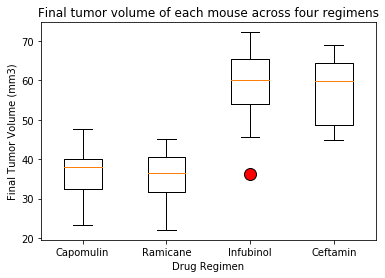

In [9]:
# Generate a box plot of the final tumor 
# volume of each mouse across four regimens of interest

mice      = df.groupby("Mouse ID")   #Group all data by mouse id
mdf       = mice.tail(1)             #Use tail(1) to retrieve the final value for each mouse

# Extract only the data for each of the four regimens of interest
capomulin = mdf[mdf["Drug Regimen"] == "Capomulin"]
ramicane  = mdf[mdf["Drug Regimen"] == "Ramicane"]
infubinol = mdf[mdf["Drug Regimen"] == "Infubinol"]
ceftamin  = mdf[mdf["Drug Regimen"] == "Ceftamin"]

# Combine the data to plot
datatoplot = [capomulin['Tumor Volume (mm3)'], 
              ramicane ['Tumor Volume (mm3)'], 
              infubinol['Tumor Volume (mm3)'], 
              ceftamin ['Tumor Volume (mm3)']]

# create a new figure
fig, ax1 = plt.subplots()
# assign axis labels and plot title
ax1.set_title('Final tumor volume of each mouse across four regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

# Create a dictionary of properties, to format outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')

# createa list of regimens to act as labels
drugnames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# create the box plt
ax1.boxplot(datatoplot, flierprops=flierprops, labels=drugnames)
# Show the plot
plt.show()

## Line and scatter plots

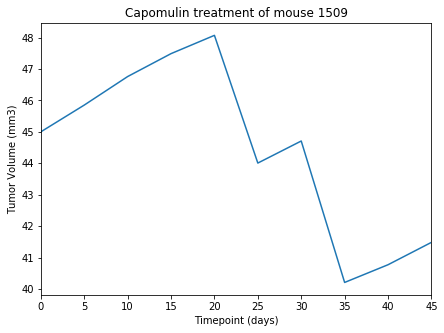

In [10]:
# Generate a line plot of time point versus tumor volume 
# for a single mouse treated with Capomulin
capomulin     = df[df["Drug Regimen"] == "Capomulin"]   # Get just capomulin data
capomulin_mid = capomulin.set_index("Mouse ID")         # re index capomulin data using mouse id as the index

onemouse = capomulin_mid.loc[["l509"]]     # Locate the mouse of interest in this case ID = 1509

# Create the line plto
mplot    = onemouse.plot(kind = 'line', legend = "", x = 'Timepoint', y ='Tumor Volume (mm3)', figsize=(7, 5))
# Create the titles 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
_ = plt.title("Capomulin treatment of mouse 1509")  #need to assign this to a variable to suppress output

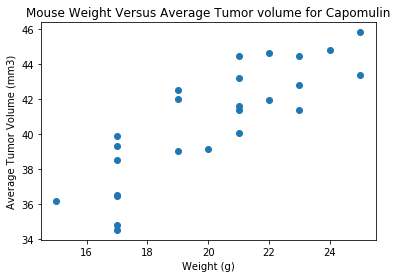

In [11]:
# Generate a scatter plot of mouse weight versus average 
# tumor volume for the Capomulin regimen
capomulin = df[df["Drug Regimen"] == "Capomulin"]  #may not need to redo this stage but just to be safe get capomulin data 

# group the mean tumor volume data by mouse id and weight 
# reset the index so we can easily access individual columns
cm = capomulin.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()  
# Create the scatter plot
plt.scatter(cm['Weight (g)'], cm['Tumor Volume (mm3)'])
# Create labels for the axes and title of the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor volume for Capomulin")
# Show the plot
plt.show()

The correlation between mouse weight and the average tumor volume  is  0.84 


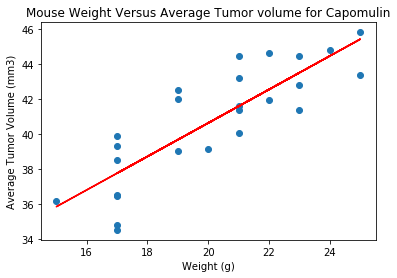

In [12]:
# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)
correlation = st.pearsonr(cm['Weight (g)'], cm['Tumor Volume (mm3)'])
# Pretty print the results
print('The correlation between mouse weight' + 
      '\033[1m and \033[0m' +
      'the average tumor volume ' +
      '\033[1m is \033[0m' + 
       f'\033[36m {correlation[0]:2.2f} \033[0m')

# pull these values from the dataframe created earlier
x_values = cm['Weight (g)']
y_values = cm['Tumor Volume (mm3)']

# Do a line regression on x and y values to calculate values for the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a scatter plot of weight versus average tumor volume
plt.scatter(x_values,y_values)
# Add a red line to indicate the correlation
plt.plot(x_values,regress_values,"r-")
# Create labels for the axes
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight Versus Average Tumor volume for Capomulin")

# Show the plot
plt.show()

# Extra Analysis (additional support for observations)

### Plot of average tumor volume across all drugs across timepoints

Only two drug regimens (capomulin and ramicane) reduced averate tumor volume



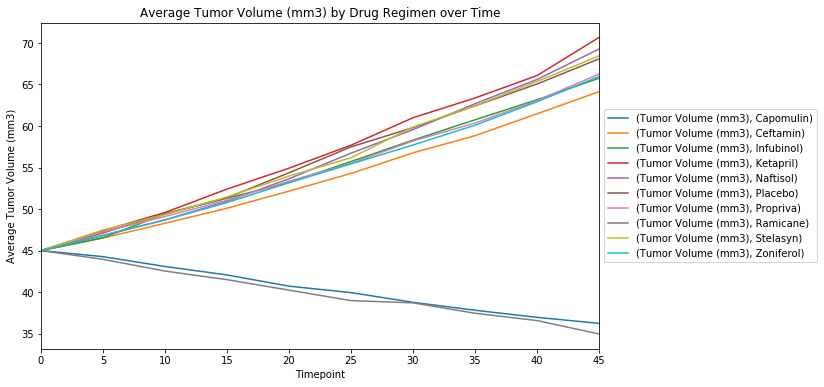

In [13]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor = df.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor  = pd.DataFrame(mean_tumor)

# Preview DataFrame
#mean_tumor.unstack(level=0).plot(kind='line', subplots=True)
mean_tumor.unstack(level=0).plot(kind='line', subplots=False,  figsize=(10, 6)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Tumor Volume (mm3) by Drug Regimen over Time')
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
#mean_tumor

### Plot of percentage change in average tumor size from first timepoint to last timepoint

As can be seen from the bar plot only two drug regimens reduced the size of tumors 

Ramicane  by approximately 19% 
Capomulin by approximately 17%


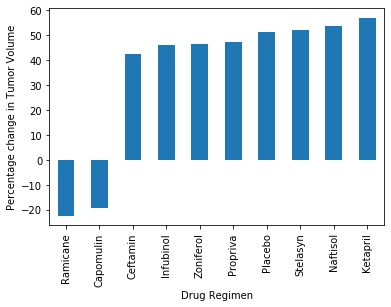

In [14]:
#get the first and last average tumor volume for each regimen
original      = mean_tumor.groupby('Drug Regimen').first()
final_volumes = mean_tumor.groupby('Drug Regimen').last()

#construct a list of percentage changes from original volume to final volume
percentage_change = []
for drug in original.index:
    #print(drug)
    change = (100 * (final_volumes.loc[(drug)]['Tumor Volume (mm3)'] -
          original.loc[(drug)]['Tumor Volume (mm3)'])/
          original.loc[(drug)]['Tumor Volume (mm3)'])
    percentage_change.append(change)

# create and sort a new dataframe
d = {'Drug Regimen':original.index,'Change':percentage_change}   
change_df = pd.DataFrame(d)
change_df = change_df.sort_values('Change', ascending=True)

barchart = change_df.plot.bar(x='Drug Regimen', y = "Change", legend="")
barchart.set_xlabel("Drug Regimen")
_       = barchart.set_ylabel("Percentage change in Tumor Volume")

### Plot timepoint versus tumor volume data for all mice treated with Capomulin

Examine the trend over timepoints for tumor volume for all the mice treated with Capomulin

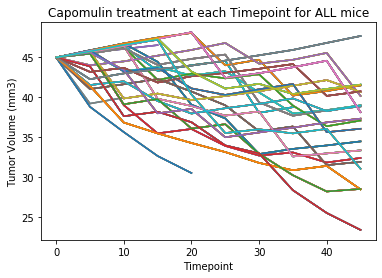

In [15]:
# Generate a line plot of time point versus tumor volume 
# for a all the mouse treated with Capomulin
capomulin     = df[df["Drug Regimen"] == "Capomulin"]   # Get just capomulin data
capomulin_mid = capomulin.set_index("Mouse ID")         # re index capomulin data using mouse id as the index

for mouse in capomulin_mid.index:
    onemouse = capomulin_mid.loc[mouse]     # Locate the mouse of interest in this case ID = 1509
    plt.plot(onemouse['Timepoint'], onemouse['Tumor Volume (mm3)'])
# # Create the titles 
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
_ = plt.title("Capomulin treatment at each Timepoint for ALL mice")  #need to assign this to a variable to suppress output

### End of Notebook 